13. This question should be answered using the Weekly data set, which
is part of the ISLR2 package. This data is similar in nature to the
Smarket data from this chapter’s lab, except that it contains 1, 089
weekly returns for 21 years, from the beginning of 1990 to the 2010

In [181]:
library(ISLR2)
library(ggplot2)
library(dplyr)
library(tibble)
library(tidyr)
library(caret)
library(MASS)#lda/qda
library(class)#knn
library(e1071)

(a) Produce some numerical and graphical summaries of the Weekly
data. Do there appear to be any patterns?

In [182]:
Weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
4,1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
5,1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
6,1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down
7,1990,-1.372,1.178,0.712,3.514,-2.576,0.1517220,0.807,Up
8,1990,0.807,-1.372,1.178,0.712,3.514,0.1323100,0.041,Up
9,1990,0.041,0.807,-1.372,1.178,0.712,0.1439720,1.253,Up


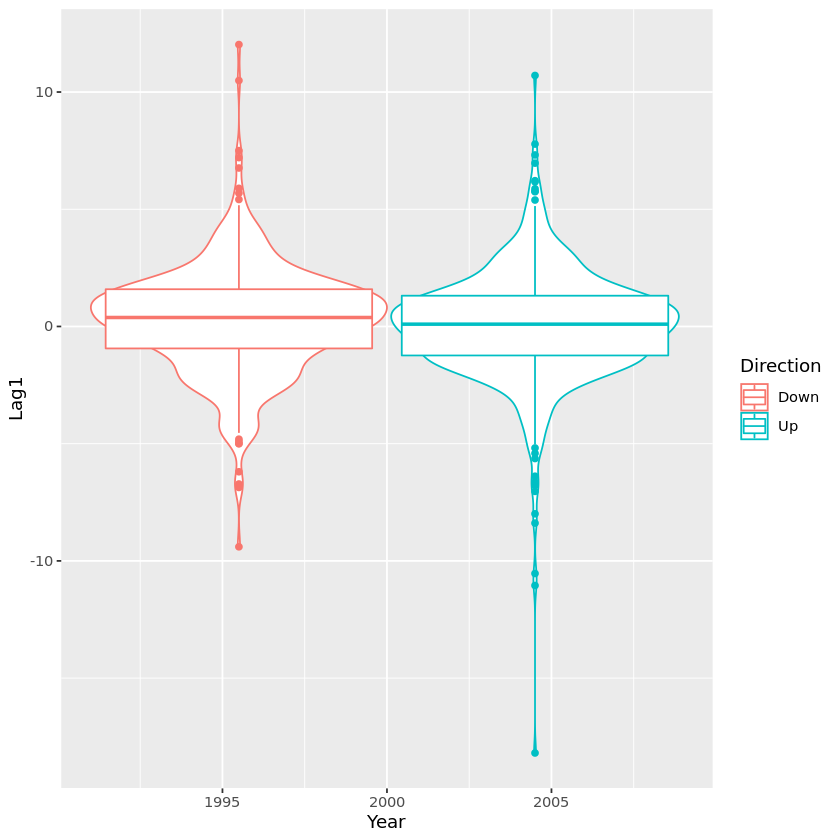

In [183]:
ggplot(Weekly, aes(x=Year,color=Direction)) +
geom_violin(aes(y=Lag1))+
geom_boxplot(aes(y=Lag1))

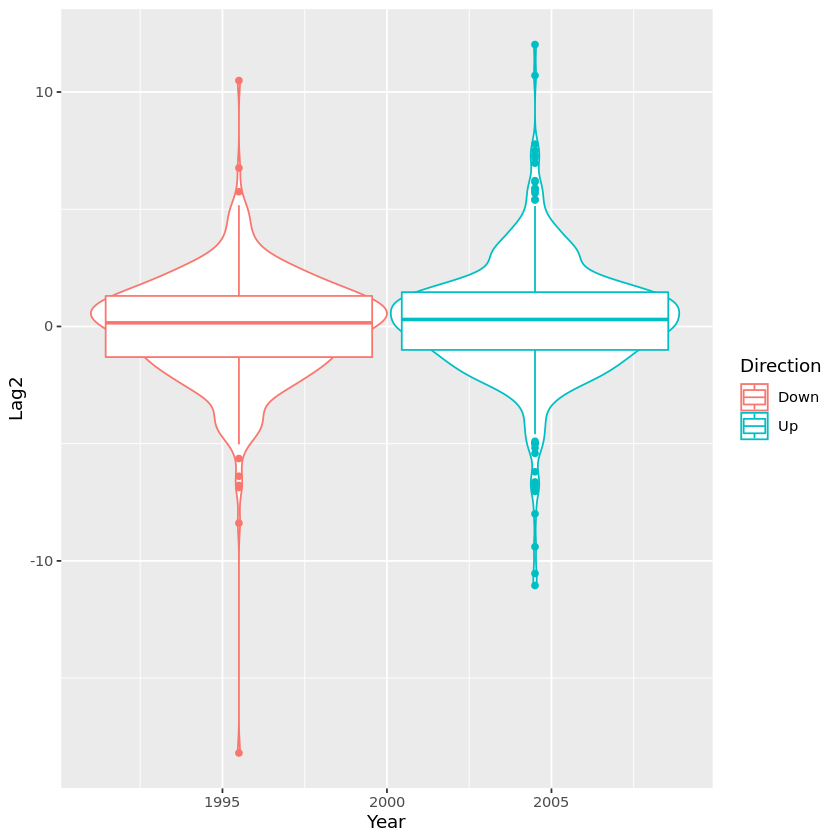

In [184]:
ggplot(Weekly, aes(x=Year,color=Direction)) +
geom_violin(aes(y=Lag2))+
geom_boxplot(aes(y=Lag2))

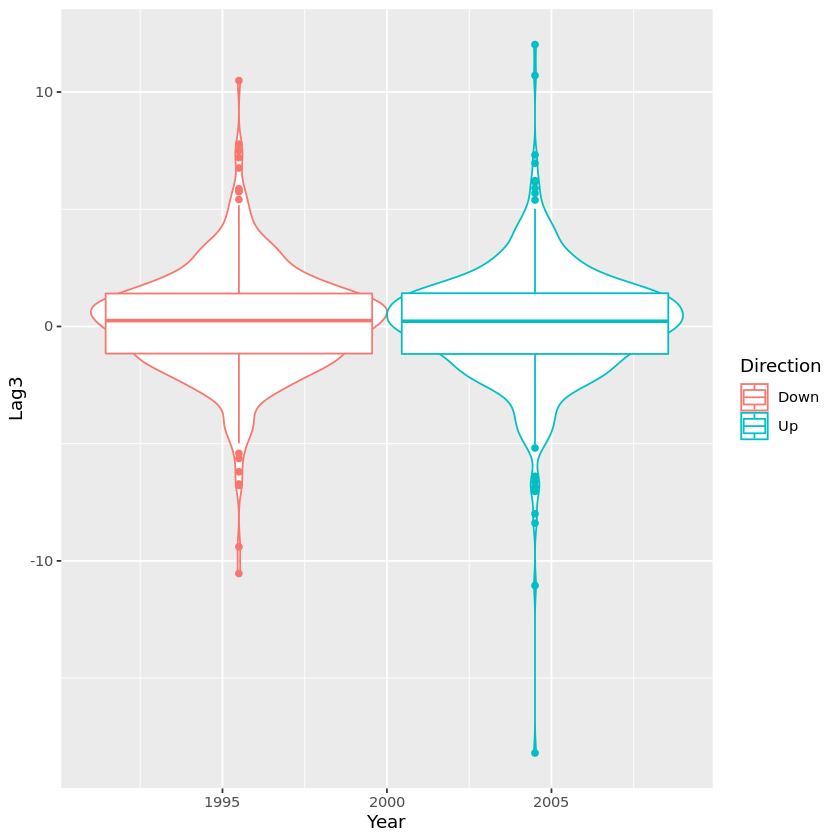

In [185]:
ggplot(Weekly, aes(x=Year,color=Direction)) +
geom_violin(aes(y=Lag3))+
geom_boxplot(aes(y=Lag3))

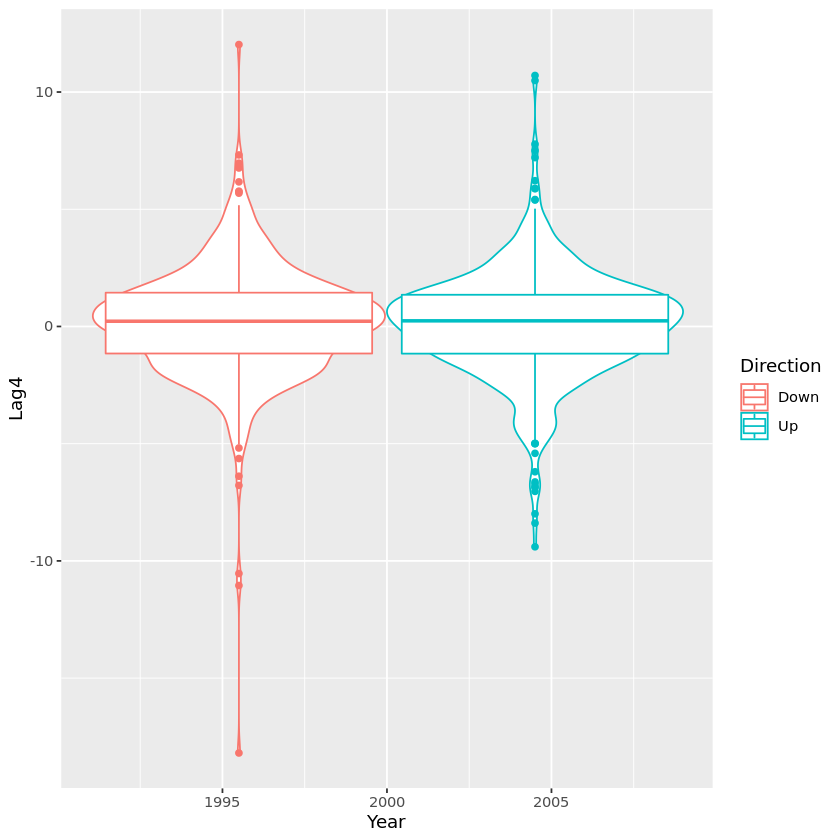

In [186]:
ggplot(Weekly, aes(x=Year,color=Direction)) +
geom_violin(aes(y=Lag4))+
geom_boxplot(aes(y=Lag4))

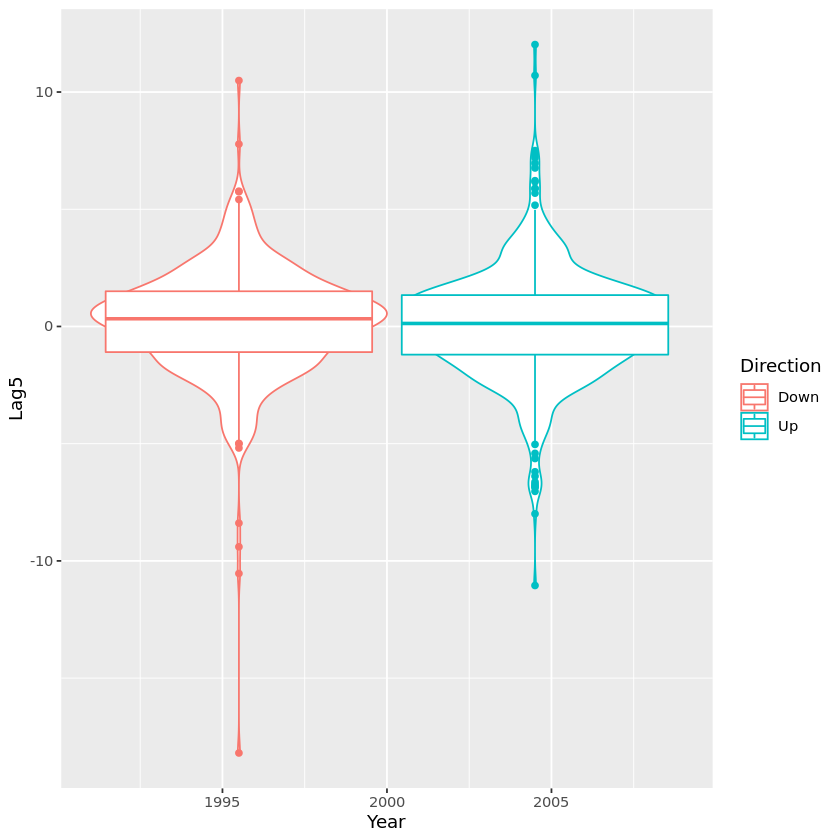

In [187]:
ggplot(Weekly, aes(x=Year,color=Direction)) +
geom_violin(aes(y=Lag5))+
geom_boxplot(aes(y=Lag5))

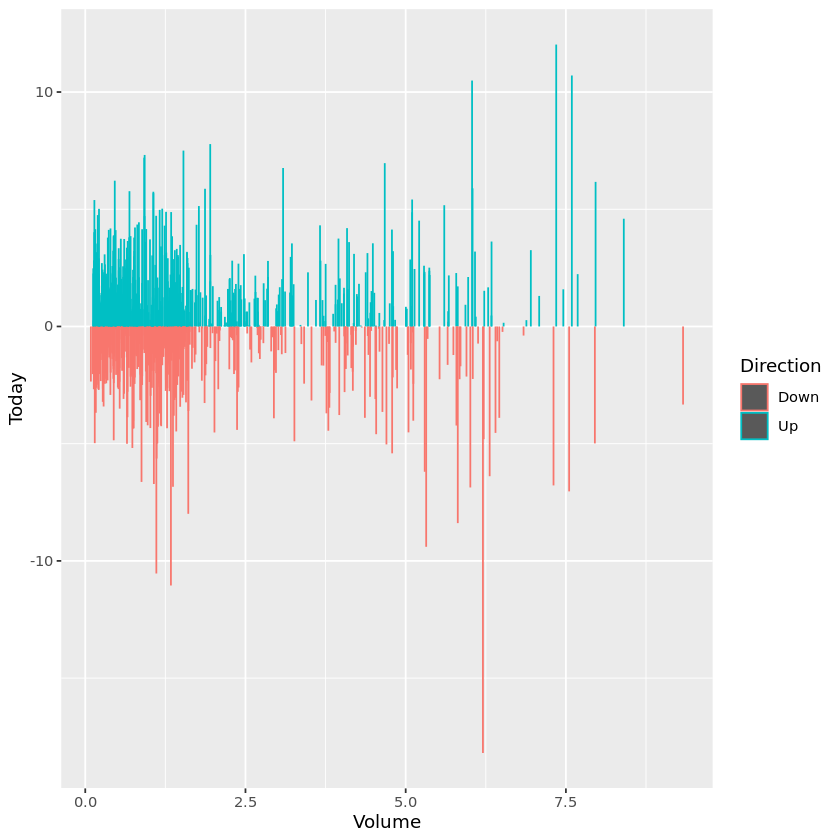

In [188]:
ggplot(Weekly, aes(x=Volume, color=Direction)) +
geom_col(aes(y=Today))

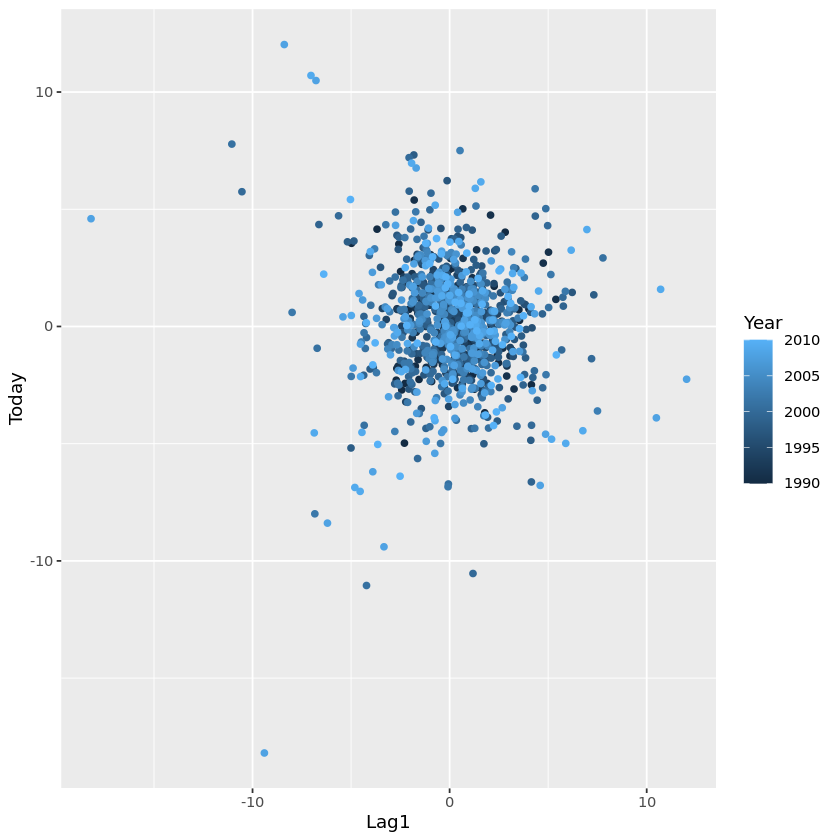

In [189]:
ggplot(Weekly, aes(x=Lag1, color=Year)) +
geom_point(aes(y=Today))

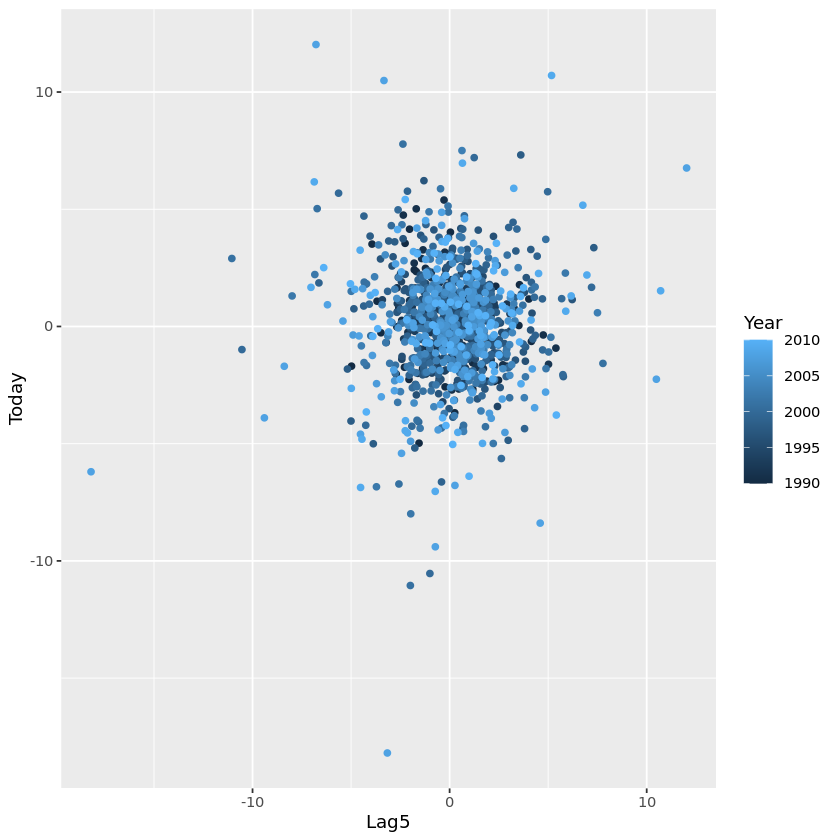

In [190]:
ggplot(Weekly, aes(x=Lag5, color=Year)) +
geom_point(aes(y=Today))

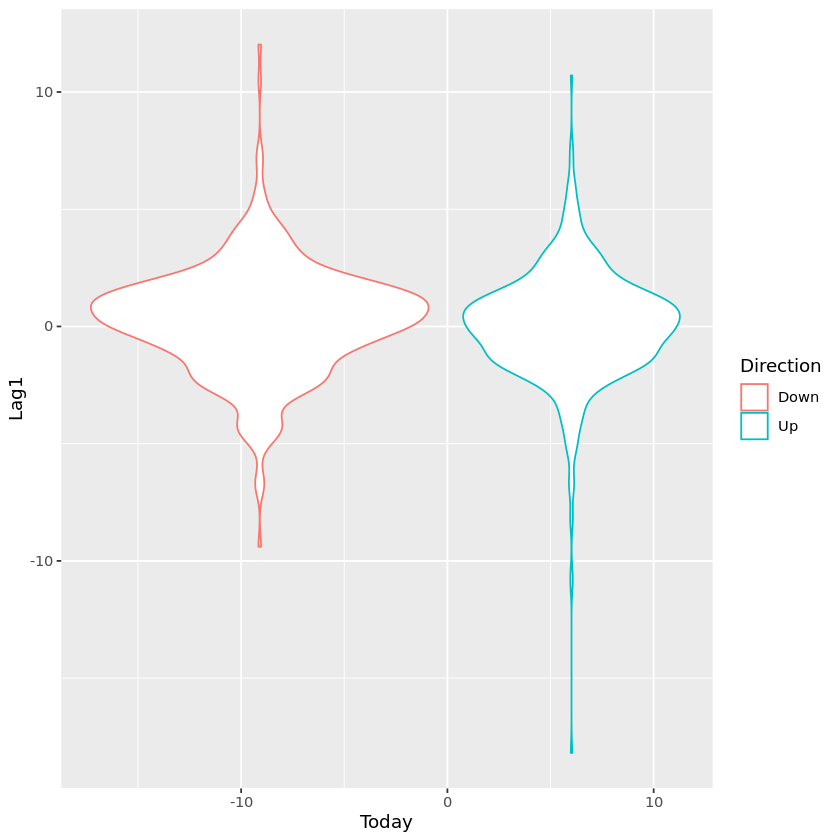

In [191]:
ggplot(Weekly, aes(x=Today, color=Direction)) +
geom_violin(aes(y=Lag1))

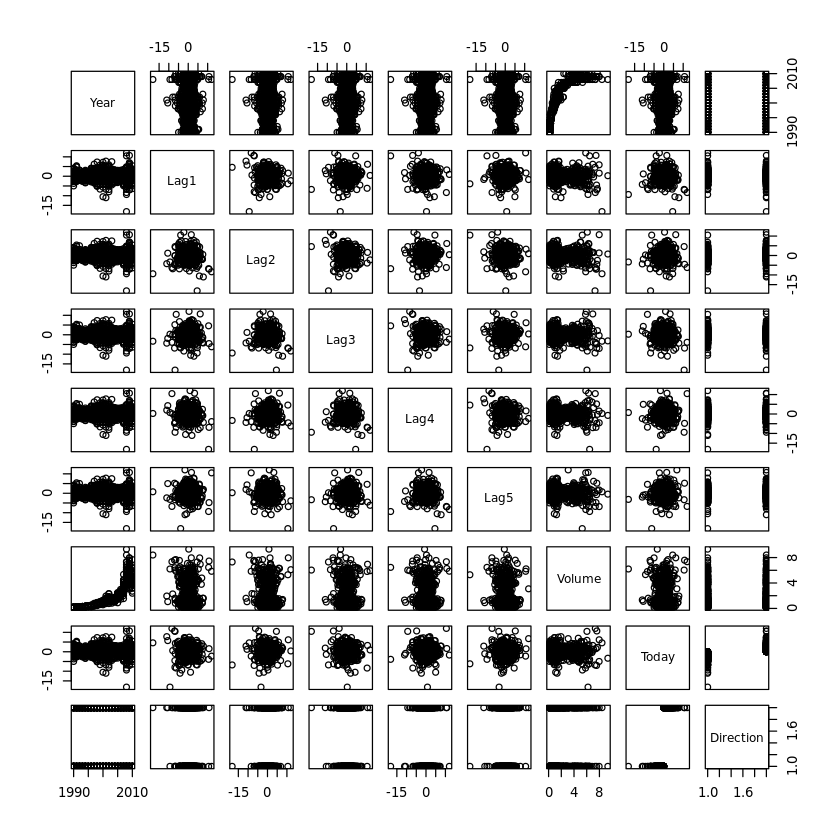

In [192]:
pairs(Weekly)

(b) Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?

In [193]:
logistic <- glm(
    Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume,
    data = Weekly, family = binomial
  )
summary(logistic)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


In [194]:
#Only Lag 2 appears to be significant (Lag 1 is pretty close)

(c) Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.

In [195]:
logistic_probs = predict(logistic, type="response")
logistic_res = {Direction= as.factor(ifelse(logistic_probs>0.5, "Up", "Down"))}

In [204]:
#Confusion Matrix
cf1 <- table(logistic_res, Weekly$Direction)
cf1
#https://www.statology.org/confusion-matrix-in-r/
sensitivity(Weekly$Direction, logistic_res) #The “true positive rate” (correctly said yes)
specificity(Weekly$Direction, logistic_res) #“true negative rate” (correctly said no)
#misClassError(Weekly$Direction, logistic_res, threshold=optimal) #misclas
mc_log = (cf1[1,1] + cf1[2,2])/ sum(cf1)
#Types of mistakes that were mdae - 54 correctly classified as down, 

            
logistic_res Down  Up
        Down   54  48
        Up    430 557

[1] 0.5294118

[1] 0.5643364

(d) Now fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

In [205]:
trainL = Weekly$Year<=2008
train = Weekly[trainL,]
test = Weekly[!trainL,]
logistic2 <- glm(Direction ~ Lag2, data=Weekly, family=binomial, subset=trainL)
#summary(logistic2)
logistic2_probs = predict(logistic2, test, type="response")
logistic2_res = {Direction= as.factor(ifelse(logistic2_probs>0.5, "Up", "Down"))}
#Confusion Matrix
cf1_2 <- table(logistic2_res, test$Direction)
cf1_2
mc_log2 = (cf1_2[1,1] + cf1_2[2,2])/ sum(cf1_2)
mc_log2

             
logistic2_res Down Up
         Down    9  5
         Up     34 56

[1] 0.625

(e) Repeat (d) using LDA.

          
resLDA_res Down Up
      Down    9  5
      Up     34 56

[1] 0.625

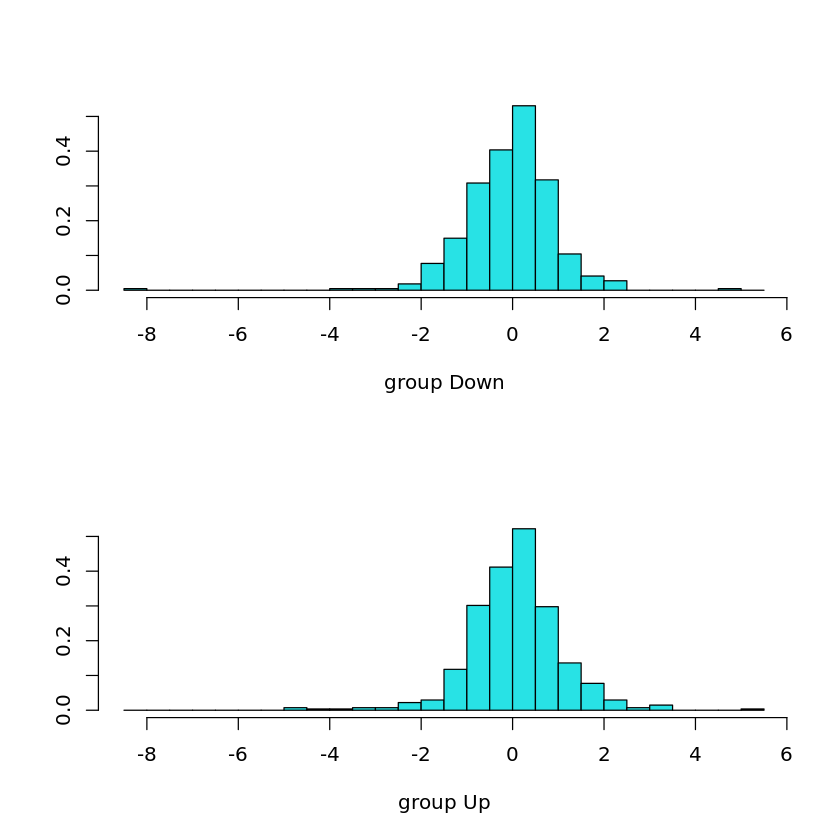

In [198]:
resLDA <- lda(Direction ~ Lag2, data=Weekly, subset=trainL)
plot(resLDA)
resLDA_pred = predict(resLDA, test, type="response")
#Confusion Matrix
resLDA_res <- resLDA_pred$class
table(resLDA_res, test$Direction)
mc_lda = mean(resLDA_res == test$Direction)
mc_lda

(f) Repeat (d) using QDA.

In [199]:
resQDA <- qda(Direction ~ Lag2, data=Weekly, subset=trainL)
#plot(resQDA)
resQDA_pred = predict(resQDA, test, type="response")
#Confusion Matrix
resQDA_res <- resQDA_pred$class
table(resQDA_res, test$Direction)
mc_qda = mean(resQDA_res == test$Direction)
mc_qda

          
resQDA_res Down Up
      Down    0  0
      Up     43 61

[1] 0.5865385

(g) Repeat (d) using KNN with K = 1.

In [200]:
X_Train <- Weekly[trainL,]['Lag2']

In [201]:
X_Train <- Weekly[trainL,]['Lag2']
X_Test <- Weekly[!trainL,]['Lag2']#test.X <- cbind(Lag1, Lag2)[!train, ]
Y_Train <- Weekly[trainL, 'Direction']
Y_Test <- Weekly[!trainL, 'Direction']
set.seed(1)
knn.pred <- knn(X_Train, X_Test, Y_Train, k = 1)
cf1_knn <- table(knn.pred, Y_Test)
cf1_knn
mc_knn = (cf1_knn[1,1] + cf1_knn[2,2])/ sum(cf1_knn)
mc_knn
#X_Train, X_Test

        Y_Test
knn.pred Down Up
    Down   21 30
    Up     22 31

[1] 0.5

(h) Repeat (d) using naive Bayes.

In [202]:
nb.fit <- naiveBayes(Direction ~ Lag2, data = Weekly,
    subset = trainL)
nb.fit
nb.class <- predict(nb.fit, test)
table(nb.class, test$Direction)
mc_nb = mean(nb.class == test$Direction)
mc_nb


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
     Down        Up 
0.4477157 0.5522843 

Conditional probabilities:
      Lag2
Y             [,1]     [,2]
  Down -0.03568254 2.199504
  Up    0.26036581 2.317485


        
nb.class Down Up
    Down    0  0
    Up     43 61

[1] 0.5865385

(i) Which of these methods appears to provide the best results on
this data?

In [206]:
mc_log
mc_log2
mc_lda
mc_qda
mc_knn
mc_nb#Naive Bayes

[1] 0.5610652

[1] 0.625

[1] 0.625

[1] 0.5865385

[1] 0.5

[1] 0.5865385

(j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the
methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held
out data. Note that you should also experiment with values for
K in the KNN classifier.

In [208]:
#Logistic - added Lag1; was worse (0.58)
# LDA - added Lag1 - was worse 0.576; Lag 1, 2, 4 was 0.605
# QDA - lag2 and lag 3 make 0.605
# KNN - for K=4; 0.615 - not bad!

             
logistic2_res Down Up
         Down    9  5
         Up     34 56

[1] 0.625

In [222]:
logistic2 <- glm(Direction ~ Lag1 + Lag2 + Lag4, data=Weekly, family=binomial, subset=trainL)
#summary(logistic2)
logistic2_probs = predict(logistic2, test, type="response")
logistic2_res = {Direction= as.factor(ifelse(logistic2_probs>0.5, "Up", "Down"))}
#Confusion Matrix
cf1_2 <- table(logistic2_res, test$Direction)
cf1_2
mc_log2 = (cf1_2[1,1] + cf1_2[2,2])/ sum(cf1_2)
mc_log2

             
logistic2_res Down Up
         Down    9  7
         Up     34 54

[1] 0.6057692

          
resLDA_res Down Up
      Down    9  7
      Up     34 54

[1] 0.6057692

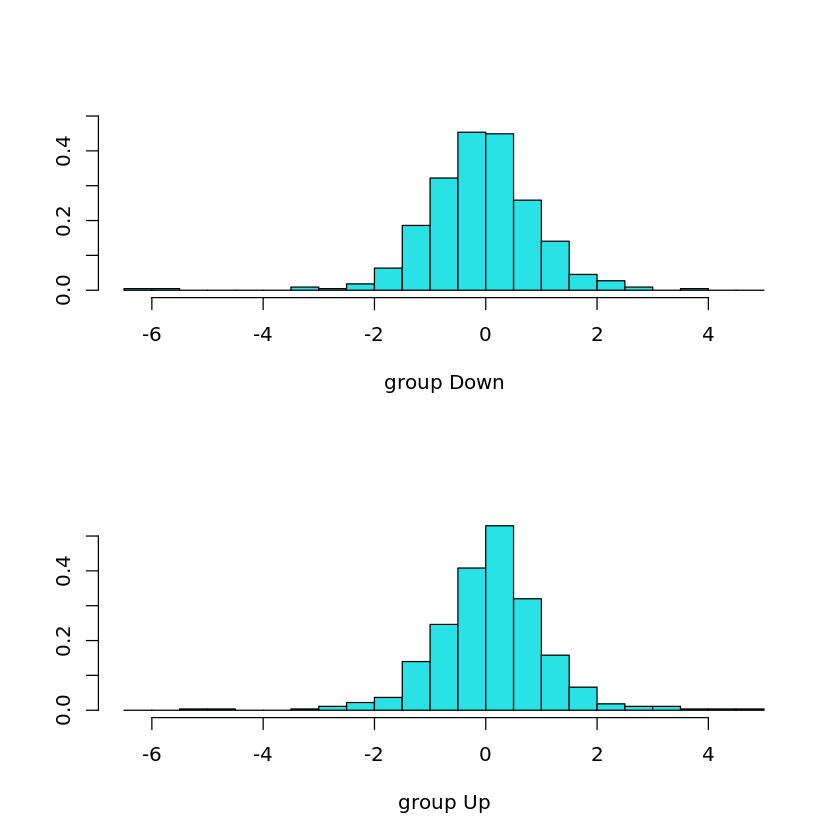

In [219]:
resLDA <- lda(Direction ~ Lag1 + Lag2 + Lag4, data=Weekly, subset=trainL)
plot(resLDA)
resLDA_pred = predict(resLDA, test, type="response")
#Confusion Matrix
resLDA_res <- resLDA_pred$class
table(resLDA_res, test$Direction)
mc_lda = mean(resLDA_res == test$Direction)
mc_lda

In [237]:
resQDA <- qda(Direction ~ Lag3 + Lag2, data=Weekly, subset=trainL)
#plot(resQDA)
resQDA_pred = predict(resQDA, test, type="response")
#Confusion Matrix
resQDA_res <- resQDA_pred$class
table(resQDA_res, test$Direction)
mc_qda = mean(resQDA_res == test$Direction)
mc_qda

          
resQDA_res Down Up
      Down    4  2
      Up     39 59

[1] 0.6057692

In [242]:
X_Train <- Weekly[trainL,]['Lag2']
X_Test <- Weekly[!trainL,]['Lag2']#test.X <- cbind(Lag1, Lag2)[!train, ]
Y_Train <- Weekly[trainL, 'Direction']
Y_Test <- Weekly[!trainL, 'Direction']
set.seed(1)
knn.pred <- knn(X_Train, X_Test, Y_Train, k = 4)
cf1_knn <- table(knn.pred, Y_Test)
cf1_knn
mc_knn = (cf1_knn[1,1] + cf1_knn[2,2])/ sum(cf1_knn)
mc_knn
#X_Train, X_Test

        Y_Test
knn.pred Down Up
    Down   20 17
    Up     23 44

[1] 0.6153846

In [243]:
X_Train <- Weekly[trainL,]['Lag2']
X_Test <- Weekly[!trainL,]['Lag2']#test.X <- cbind(Lag1, Lag2)[!train, ]
Y_Train <- Weekly[trainL, 'Direction']
Y_Test <- Weekly[!trainL, 'Direction']
set.seed(1)
knn.pred <- knn(X_Train, X_Test, Y_Train, k = 4)
cf1_knn <- table(knn.pred, Y_Test)
cf1_knn
mc_knn = (cf1_knn[1,1] + cf1_knn[2,2])/ sum(cf1_knn)
mc_knn
#X_Train, X_Test

        Y_Test
knn.pred Down Up
    Down   20 17
    Up     23 44

[1] 0.6153846

In [252]:
nb.fit <- naiveBayes(Direction ~ Lag1  + Lag2 + Lag5, data = Weekly,
    subset = trainL)
nb.fit
nb.class <- predict(nb.fit, test)
table(nb.class, test$Direction)
mc_nb = mean(nb.class == test$Direction)
mc_nb


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
     Down        Up 
0.4477157 0.5522843 

Conditional probabilities:
      Lag1
Y              [,1]     [,2]
  Down  0.289444444 2.211721
  Up   -0.009213235 2.308387

      Lag2
Y             [,1]     [,2]
  Down -0.03568254 2.199504
  Up    0.26036581 2.317485

      Lag5
Y            [,1]     [,2]
  Down 0.21409297 2.368626
  Up   0.04548897 2.194109


        
nb.class Down Up
    Down    6 17
    Up     37 44

[1] 0.4807692

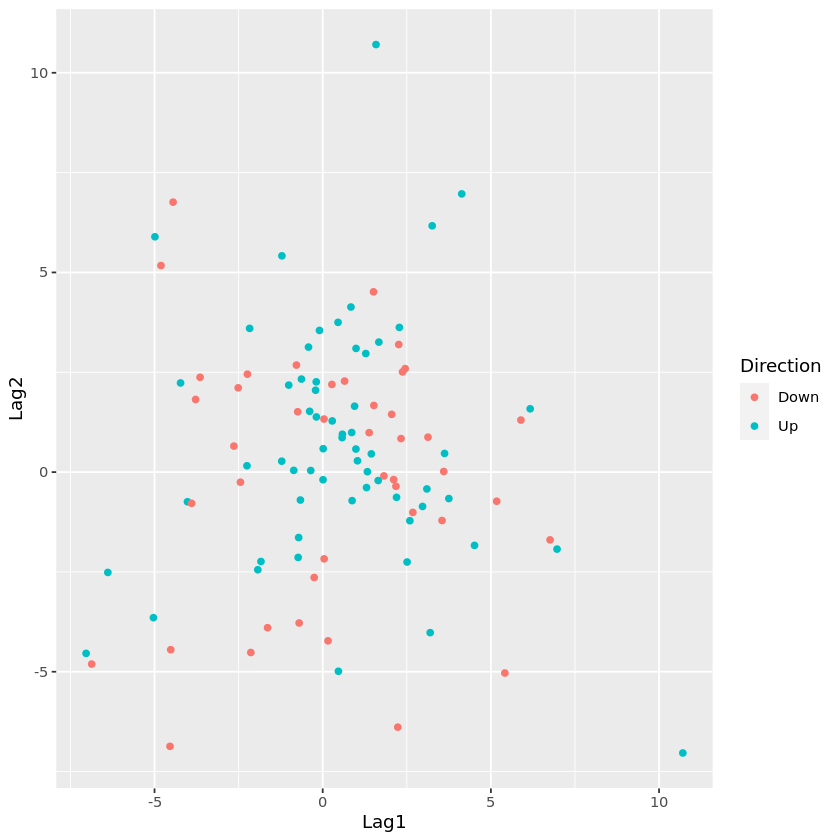

In [260]:
ggplot(Weekly[Weekly$Year>2008,], aes(x=Lag1, y=Lag2, color=Direction)) + 
geom_point()

In [263]:
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500
7,14,8,454,220,4354,9.0,70,1,chevrolet impala
8,14,8,440,215,4312,8.5,70,1,plymouth fury iii
9,14,8,455,225,4425,10.0,70,1,pontiac catalina
